### End 2 End NLP Project
+ Emotion Detection In Text
+ Text Classifier


In [5]:
# load EDA pkgs

import pandas as pd
import numpy as np

In [6]:
# load data viz pkgs
import seaborn as sns

In [13]:
# load text cleaning pkgs
!pip install neattext
import neattext.functions as nfx

  Using cached neattext-0.1.3-py3-none-any.whl (114 kB)


In [15]:
#load ml pkgs 
# estimators

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [17]:
# load dataset
df = pd.read_csv("data/tweet_emotions.csv")
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [18]:
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

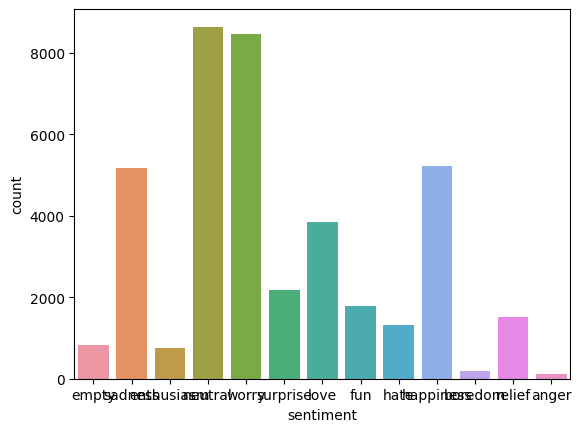

In [24]:
# plot

sns.countplot(x="sentiment" , data = df , linewidth=20)

In [25]:
# data cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [28]:
# user handles
df['clean_text']=  df['content'].apply(nfx.remove_userhandles)

In [32]:
# stopwords
df['clean_text']=  df['clean_text'].apply(nfx.remove_stopwords)

In [37]:
# stopwords
# df['clean_text']=  df['clean_text'].apply(nfx.remove_spacial_cha)

In [39]:
df

In [43]:
#  featuresv and lables

Xfeatures = df['clean_text']
Ylabels = df['sentiment']

In [58]:
# split data

x_train, x_test , y_train , y_test= train_test_split(Xfeatures , Ylabels, test_size=0.3 , random_state=42)

In [59]:
# building pipeline

from sklearn.pipeline import Pipeline

In [60]:
# Logistic Regression
pipe_lr = Pipeline(steps=[('cv' , CountVectorizer()),('lr' , LogisticRegression())])

In [61]:
# train and fit data
pipe_lr.fit(x_train , y_train)

C:\Users\Lenovo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [62]:
# check accuracy
pipe_lr.score(x_test , y_test)

0.3343333333333333

In [63]:
# make a prediction

ex1 = "This book was so interesting it made me happy"

In [64]:
pipe_lr.predict([ex1])

array(['happiness'], dtype=object)

In [65]:
pipe_lr.predict_proba([ex1])

array([[1.33200662e-03, 2.86779713e-03, 2.65482833e-04, 5.52240820e-03,
        3.34217567e-03, 6.34158143e-01, 4.69211485e-03, 2.06055693e-01,
        4.73256239e-02, 8.85271978e-03, 3.24143938e-02, 2.61265341e-02,
        2.70449076e-02]])

In [68]:
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [69]:
# save model & pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_08_2023.pkl" , "wb")
joblib.dump(pipe_lr , pipeline_file)
pipeline_file.close()